<a href="https://colab.research.google.com/github/KlemLemony/NHL_EDA/blob/main/NHL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
from scipy. stats import pearsonr
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('/content/gdrive/MyDrive/data_sets/Predict_NHL_Player_Salaries_train.csv', encoding = 'windows 1251')
test_without_salaries = pd.read_csv('/content/gdrive/MyDrive/data_sets/Predict NHL Player Salaries_test.csv', encoding = 'windows 1251')
test_salaries = pd.read_csv('/content/gdrive/MyDrive/data_sets/Predict NHL Player Salaries_test_salaries.csv', encoding = 'windows 1251')

Объединяю датасеты в один.

In [4]:
test = pd.concat([test_without_salaries, test_salaries], axis=1)
columns_name = pd.DataFrame(train.columns.values.tolist(), columns=['train'])
columns_name['test'] = test.columns.values.tolist()
salary = pd.concat([train, test]) # вот финальный датасет, с которым я буду работать

In [5]:
len(salary.index) #смотрим сколько всего записей в таблице

874

In [6]:
[column for column in salary] # смотрим название колонок (salary.columns.values.tolist() - еще можно так посмотреть)

['Salary',
 'Born',
 'City',
 'Pr/St',
 'Cntry',
 'Nat',
 'Ht',
 'Wt',
 'DftYr',
 'DftRd',
 'Ovrl',
 'Hand',
 'Last Name',
 'First Name',
 'Position',
 'Team',
 'GP',
 'G',
 'A',
 'A1',
 'A2',
 'PTS',
 '+/-',
 'E+/-',
 'PIM',
 'Shifts',
 'TOI',
 'TOIX',
 'TOI/GP',
 'TOI/GP.1',
 'TOI%',
 'IPP%',
 'SH%',
 'SV%',
 'PDO',
 'F/60',
 'A/60',
 'Pct%',
 'Diff',
 'Diff/60',
 'iCF',
 'iCF.1',
 'iFF',
 'iSF',
 'iSF.1',
 'iSF.2',
 'ixG',
 'iSCF',
 'iRB',
 'iRS',
 'iDS',
 'sDist',
 'sDist.1',
 'Pass',
 'iHF',
 'iHF.1',
 'iHA',
 'iHDf',
 'iMiss',
 'iGVA',
 'iTKA',
 'iBLK',
 'iGVA.1',
 'iTKA.1',
 'iBLK.1',
 'BLK%',
 'iFOW',
 'iFOL',
 'iFOW.1',
 'iFOL.1',
 'FO%',
 '%FOT',
 'dzFOW',
 'dzFOL',
 'nzFOW',
 'nzFOL',
 'ozFOW',
 'ozFOL',
 'FOW.Up',
 'FOL.Up',
 'FOW.Down',
 'FOL.Down',
 'FOW.Close',
 'FOL.Close',
 'OTG',
 '1G',
 'GWG',
 'ENG',
 'PSG',
 'PSA',
 'G.Bkhd',
 'G.Dflct',
 'G.Slap',
 'G.Snap',
 'G.Tip',
 'G.Wrap',
 'G.Wrst',
 'CBar ',
 'Post',
 'Over',
 'Wide',
 'S.Bkhd',
 'S.Dflct',
 'S.Slap',
 'S.

1. Работаю с пропусками

Признаков чертовски много, просто так не посмотришь пропущенный значения. Здесь я создала датафрейм missing_val, чтобы посмотреть в каких есть пропущенные значения.

In [7]:
check_missing_val = pd.DataFrame(salary.isnull().sum(), columns=['count'])
missing_val = check_missing_val.query('count != 0')

Но в датафрейме получилось 63 строки (у 63 признаков пропущенны значения) и просто так вывести весь датафрейм тоже не получится. Поэтому, вытягиваю значения через цикл.

In [8]:
for index, value in missing_val.iterrows():
  print(index, value)

Pr/St count    225
Name: Pr/St, dtype: int64
DftYr count    125
Name: DftYr, dtype: int64
DftRd count    125
Name: DftRd, dtype: int64
Ovrl count    125
Name: Ovrl, dtype: int64
TOIX count    1
Name: TOIX, dtype: int64
TOI% count    1
Name: TOI%, dtype: int64
IPP% count    1
Name: IPP%, dtype: int64
SH% count    2
Name: SH%, dtype: int64
SV% count    1
Name: SV%, dtype: int64
PDO count    2
Name: PDO, dtype: int64
F/60 count    1
Name: F/60, dtype: int64
A/60 count    1
Name: A/60, dtype: int64
Diff/60 count    1
Name: Diff/60, dtype: int64
iCF count    11
Name: iCF, dtype: int64
iFF count    11
Name: iFF, dtype: int64
iSF count    11
Name: iSF, dtype: int64
ixG count    1
Name: ixG, dtype: int64
iSCF count    1
Name: iSCF, dtype: int64
iRB count    11
Name: iRB, dtype: int64
iRS count    1
Name: iRS, dtype: int64
iDS count    10
Name: iDS, dtype: int64
sDist.1 count    25
Name: sDist.1, dtype: int64
Pass count    1
Name: Pass, dtype: int64
iHF.1 count    1
Name: iHF.1, dtype: int64
iH

Разбираемся с первым признаком с пропущенными значениями. Это Pr/St - название штатов и провинций. Я не думаю, что эта информация очень важна, но все равно не хочу удалять. Посмотрим, может в будущем пригодится. Отсутствует 26% значения. Это немного. Значения пропущены только у иностранцев. У канадцев и американцев пропусков нет. Ниже я заполняю пропуски на INT (international).

In [9]:
salary = salary.fillna({'Pr/St': 'INT'})

In [10]:
salary['Pr/St'].unique() # смотрим какие уникальные значения у нас есть

array(['QC', 'ON', 'MN', 'INT', 'MB', 'AB', 'BC', 'SK', 'CO', 'NH', 'MI',
       'AL', 'NY', 'CT', 'NJ', 'WI', 'FL', 'PA', 'CA', 'MA', 'IL', 'AK',
       'AZ', 'MO', 'PE', 'RI', 'NS', 'ND', 'TX', 'NE', 'WA', 'OH', 'UT',
       'NC', 'IN', 'OK', 'ME', 'NL', 'SC'], dtype=object)

Попробую сделать признак числовым, чтобы дальше с ним можно было работать. Легенда:
QC-1, ON-2, MN-3, INT-4, MB-5, AB-6, BC-7, SK-8, CO-9, NH-10, MI-11, AL-12, NY-13, CT-14, NJ-15, WI-16, FL-17, PA-18, CA-19, MA-20, IL-21, AK-22, AZ-23, MO-24, PE-25, RI-26, NS-27, ND-28, TX-29, NE-30, WA-31, OH-32, UT-33, NC-34, IN-35, OK-36, ME-37, NL-38, SC-39.

Но мне сыкотно, поэтому я создам копию датафрейма, чтобы не зафакапить все. Дальше буду работать с датафреймом slry

In [11]:
slry = salary.copy()
id(salary) # проверяем, что объекты разные и хранятся в разных блоках памяти
id(slry)

139774767740336

Поняла, что есть потенциальная проблема. Если я закодирую по легенде выше, то, если буду использовать признак для обучения, модель будет назначать больший вес тем значениям, цифра которых выше. Хотя, в данном датасете, эти цифры не несут под собой никакого смысла.

Тогда можно было бы воспользоваться унитарным кодирование, но тогда +39 столбцов к датасету.

In [12]:
cleanup_prst = {'Pr/St': {'QC':1, 'ON':2, 'MN':3, 'INT':4, 'MB':5, 'AB':6, 'BC':7, 'SK':8, 'CO':9, 'NH':10, 'MI':11, 'AL':12, 'NY':13, 'CT':14, 'NJ':15, 'WI':16, 'FL':17, 'PA':18, 'CA':19, 'MA':20, 'IL':21, 'AK':22, 'AZ':23, 'MO':24, 'PE':25, 'RI':26, 'NS':27, 'ND':28, 'TX':29, 'NE':30, 'WA':31, 'OH':32, 'UT':33, 'NC':34, 'IN':35, 'OK':36, 'ME':37, 'NL':38, 'SC':39.}}

In [13]:
slry = slry.replace(cleanup_prst)

In [14]:
slry['Pr/St'].unique() # проверяем, что код сработал

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.])

In [15]:
salary['Pr/St'].unique() # проверяем, что переменная в первоначальном датасете осталась нетронута

array(['QC', 'ON', 'MN', 'INT', 'MB', 'AB', 'BC', 'SK', 'CO', 'NH', 'MI',
       'AL', 'NY', 'CT', 'NJ', 'WI', 'FL', 'PA', 'CA', 'MA', 'IL', 'AK',
       'AZ', 'MO', 'PE', 'RI', 'NS', 'ND', 'TX', 'NE', 'WA', 'OH', 'UT',
       'NC', 'IN', 'OK', 'ME', 'NL', 'SC'], dtype=object)

In [16]:
slry['Pr/St'].isnull().sum() # проверяем, что пропущенных значений в признаке больше нет

0

In [17]:
# а еще мне не нравится название признака. Переименую его
slry = slry.rename(columns = {'Pr/St': 'prst'})

<Axes: >

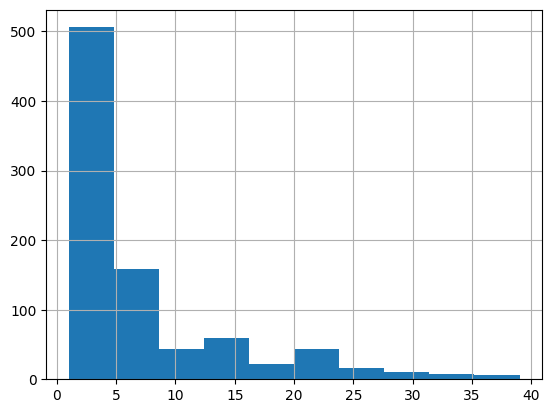

In [18]:
slry.prst.hist() # жопой жуй людей из квебека!

2. Работаем с категориальными переменными

In [19]:
# Посмотрим какие признаки категориальные
obj_slry = slry.select_dtypes(include=['object']).copy()
obj_slry # 9 категориальных признака

,Born,City,Cntry,Nat,Hand,Last Name,First Name,Position,Team
0,97-01-30,Sainte-Marie,CAN,CAN,L,Chabot,Thomas,D,OTT
1,93-12-21,Ottawa,CAN,CAN,R,Ceci,Cody,D,OTT
2,88-04-16,St. Paul,USA,USA,R,Okposo,Kyle,RW,BUF
3,92-01-07,Ottawa,CAN,CAN,R,Gudbranson,Erik,D,VAN
4,94-03-29,Toronto,CAN,CAN,R,Wilson,Tom,RW,WSH
...,...,...,...,...,...,...,...,...,...
257,97-03-11,Kingston,CAN,CAN,L,Harrington,Scott,D,CBJ
258,95-01-30,Denver,USA,USA,R,Shore,Drew,C,VAN
259,97-06-18,Toronto,CAN,CAN,R,Hamilton,Dougie,D,CGY
260,98-09-21,Hilton Head Isl.,USA,USA,R,Hartman,Ryan,LW/RW,CHI


Выяснила, что есть полностью дублирующие признаки. Для достоверности проверила их критерием Пирсона. Пришла к выводу, что буду удалять: iGVA.1, iTKA.1, iBLK.1, iFOW.1, iFOL.1, iHF.1,

In [20]:
salary['iGVA.1'].fillna(0, inplace=True)
salary = salary.astype({'iGVA.1': np.int})
pearsonr(salary['iGVA.1'], salary['iGVA']) # ого! корреляция практически 100%!

<ipython-input-20-0454ea54f1e4>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  salary = salary.astype({'iGVA.1': np.int})


PearsonRResult(statistic=0.9999069803206938, pvalue=0.0)